<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/initial_regression_analysis_national_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
excel_file = 'National tourism data monthly.xlsx'
csv_file = 'National tourism data monthly.csv'  # Choose a name for your CSV file

# Read the Excel file
df = pd.read_excel(excel_file)

# Save as CSV
df.to_csv('National tourism data monthly.csv', index=False)  # index=False prevents saving row numbers

In [4]:
df = pd.read_csv('National tourism data monthly.csv')
df.head()

,PERIODO,VALOR
0,2024_11,5665204
1,2024_10,8965310
2,2024_09,9595136
3,2024_08,10930750
4,2024_07,10851172


In [5]:
!mkdir tourism_data
!mv 'National tourism data monthly.csv' tourism_data

mkdir: cannot create directory ‘tourism_data’: File exists


In [6]:
from google.colab import files
uploaded = files.upload()


In [7]:
excel_file2 = 'National HPI quarterly.xlsx'
csv_file2 = 'National HPI quarterly.csv'  # Choose a name for your CSV file

# Read the Excel file
df2 = pd.read_excel(excel_file2)

# Save as CSV
df2.to_csv('National HPI quarterly.csv', index=False)

In [8]:
!mv 'National HPI quarterly.csv' tourism_data

In [9]:
df2.head()

,,General,Vivienda nueva,Vivienda segunda mano
0,2024_07,162.521,188.899,158.490
1,2024_04,158.083,183.813,154.152
2,2024_01,152.618,178.899,148.616
3,2023_10,148.690,169.581,145.467
4,2023_07,150.273,171.973,146.922


In [10]:
df2.columns

Index([' ', '    General', '    Vivienda nueva', '    Vivienda segunda mano'], dtype='object')

In [11]:
df['PERIODO'] = pd.to_datetime(df['PERIODO'], format='%Y_%m')


In [12]:
df2[' '] = pd.to_datetime(df2[' '], format='%Y_%m')

In [13]:

df2.rename(
    columns={
        ' ': 'Period',
        '    General': 'General HPI',
        '    Vivienda nueva': 'New housing',
        '    Vivienda segunda mano': 'Second hand housing',
    },
    inplace=True
)

In [14]:
df2.columns

Index(['Period', 'General HPI', 'New housing', 'Second hand housing'], dtype='object')

In [15]:
df.rename(columns={'PERIODO': 'Period', 'VALOR' : 'Tourist numbers'}, inplace=True)

In [16]:
df = df.set_index('Period')
df2 = df2.set_index('Period')

In [17]:
df2

,General HPI,New housing,Second hand housing
Period,,,
2024-07-01,162.521,188.899,158.490
2024-04-01,158.083,183.813,154.152
2024-01-01,152.618,178.899,148.616
2023-10-01,148.690,169.581,145.467
2023-07-01,150.273,171.973,146.922
...,...,...,...
2008-01-01,150.082,134.966,163.288
2007-10-01,150.640,134.449,164.973
2007-07-01,151.719,132.475,169.259


In [18]:
df2_filtered= df2[df2.index >= ('2015-10-01')]

In [25]:
#backfilling all non-existent values for HPI data
df2_filled = df2_filtered.resample('MS').ffill()  # Forward fill quarterly values to each month
df2_filled

,General HPI,New housing,Second hand housing
Period,,,
2015-10-01,101.305,101.678,101.241
2015-11-01,101.305,101.678,101.241
2015-12-01,101.305,101.678,101.241
2016-01-01,102.775,104.284,102.533
2016-02-01,102.775,104.284,102.533
...,...,...,...
2024-03-01,152.618,178.899,148.616
2024-04-01,158.083,183.813,154.152
2024-05-01,158.083,183.813,154.152


In [24]:
#reversig data frame 1 so that both data frames go up from 2015
df = df.iloc[::-1]  # Reverses df_tourism
df

,Tourist numbers
Period,
2015-10-01,6432341
2015-11-01,3754802
2015-12-01,3512914
2016-01-01,3526537
2016-02-01,3678726
...,...
2024-07-01,10851172
2024-08-01,10930750
2024-09-01,9595136


In [26]:
merged_df = pd.merge(df, df2_filled, left_index=True, right_index=True, how='left')

In [27]:
merged_df

,Tourist numbers,General HPI,New housing,Second hand housing
Period,,,,
2015-10-01,6432341,101.305,101.678,101.241
2015-11-01,3754802,101.305,101.678,101.241
2015-12-01,3512914,101.305,101.678,101.241
2016-01-01,3526537,102.775,104.284,102.533
2016-02-01,3678726,102.775,104.284,102.533
...,...,...,...,...
2024-07-01,10851172,162.521,188.899,158.490
2024-08-01,10930750,NaN,NaN,NaN
2024-09-01,9595136,NaN,NaN,NaN


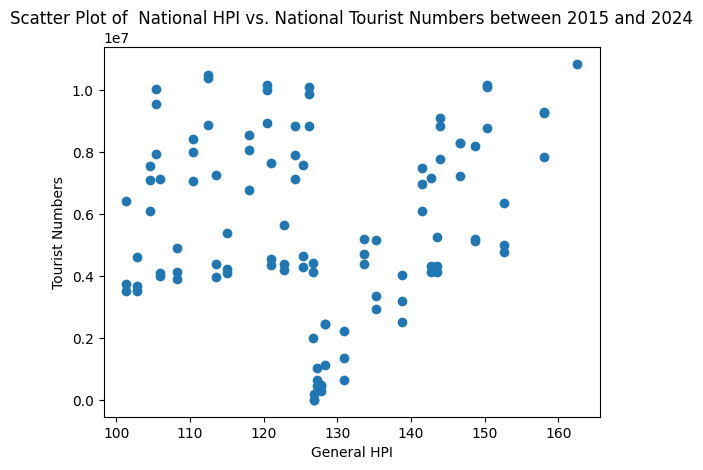

In [31]:
import matplotlib.pyplot as plt

plt.scatter(merged_df['General HPI'], merged_df['Tourist numbers'])

plt.xlabel('General HPI')
plt.ylabel('Tourist Numbers')
plt.title('Scatter Plot of  National HPI vs. National Tourist Numbers between 2015 and 2024')

plt.show()

In [32]:
#taking out covid outliers
merged_df_no_covid = merged_df[merged_df.index.year <= 2019]

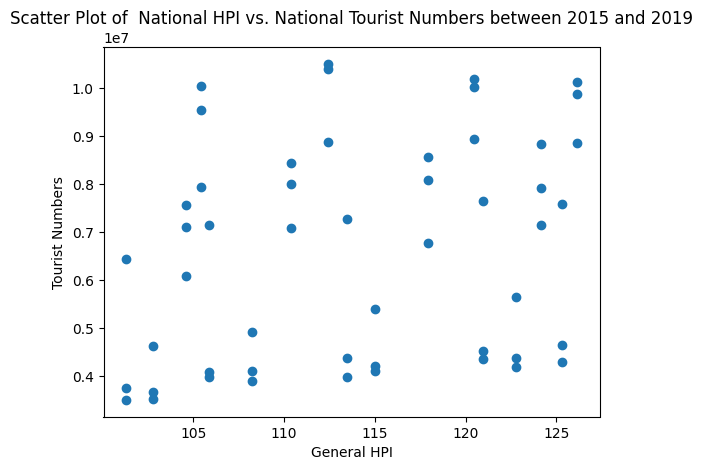

In [33]:
plt.scatter(merged_df_no_covid['General HPI'], merged_df_no_covid['Tourist numbers'])

plt.xlabel('General HPI')
plt.ylabel('Tourist Numbers')
plt.title('Scatter Plot of  National HPI vs. National Tourist Numbers between 2015 and 2019')

plt.show()

In [44]:
#renaming columns for statsmodels to read them better
merged_df_no_covid = merged_df_no_covid.rename(columns={'Tourist numbers':'Tourist_numbers', 'General HPI': 'General_HPI'})  # Rename the column

In [46]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

#creating very very basic regression analysis, with no confounding factors included
model1 = ols('Tourist_numbers ~ General_HPI', data=merged_df_no_covid).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Tourist_numbers   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     3.852
Date:                Thu, 16 Jan 2025   Prob (F-statistic):             0.0554
Time:                        19:07:20   Log-Likelihood:                -816.74
No. Observations:                  51   AIC:                             1637.
Df Residuals:                      49   BIC:                             1641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -1.95e+06   4.37e+06     -0.446      